In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

In [2]:
# Set Parameters
n_samples = 100000
num_bins = 20
length_strings = 3
num_values = 5
range_of_numbers = 100

In [3]:
def create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers):
    randoms = random.sample(range(range_of_numbers), num_values)
    sample_repetetive_numbers = [choice(randoms) for _ in range(n_samples)]
    return sample_repetetive_numbers

In [4]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [5]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

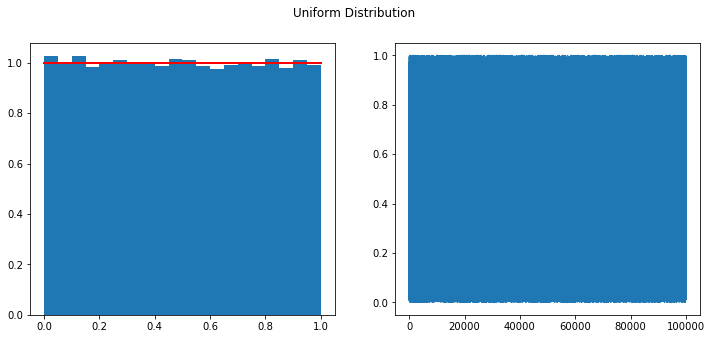

In [6]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

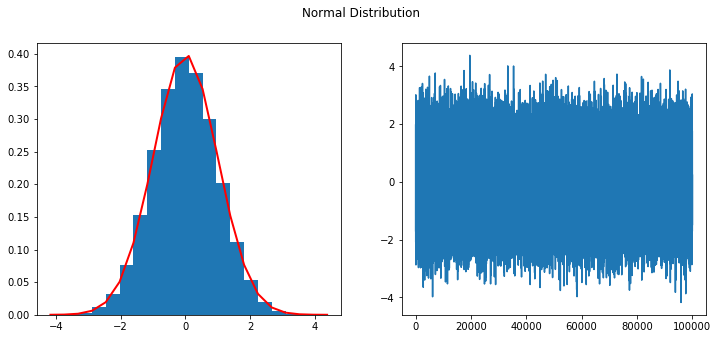

In [7]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

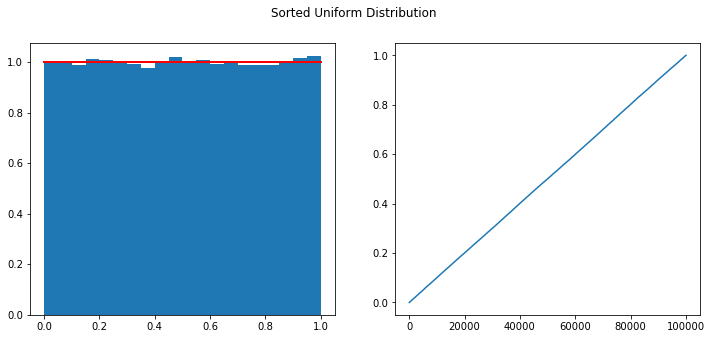

In [8]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

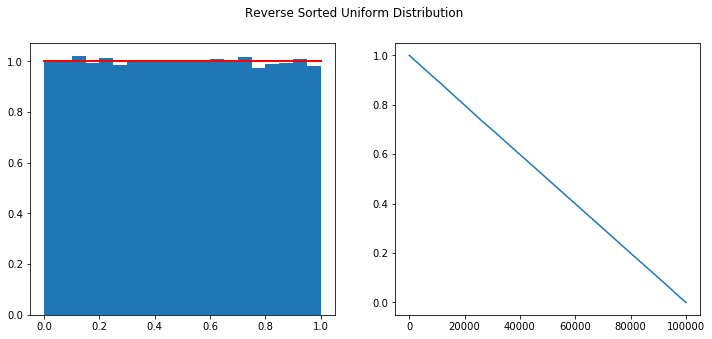

In [9]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

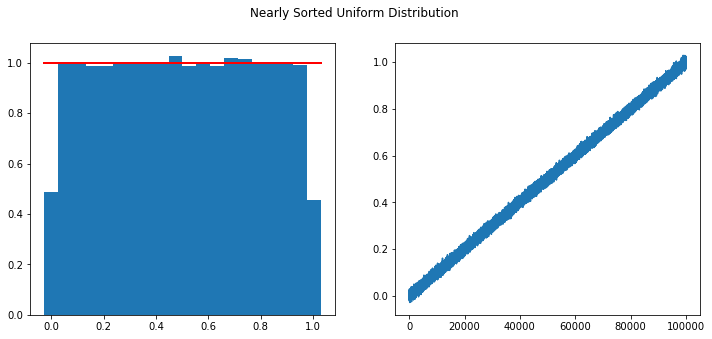

In [10]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

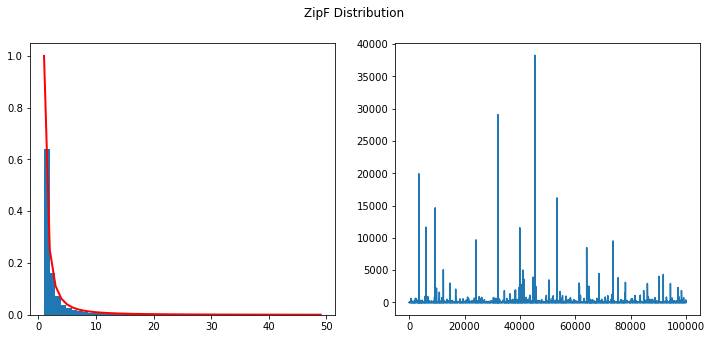

In [11]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [37]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    sample_strings = create_strings(n_samples=n_samples, length_strings=length_strings)
    sample_dates = create_dates(n_samples=n_samples)
    sample_repetetive_numbers = create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers)
    df_distribions = pd.DataFrame()#.astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    df_distribions["Strings"] = sample_strings
    df_distribions["Dates"] = sample_dates
    df_distribions["Repetetive_Numbers"] = sample_repetetive_numbers
    
    return df_distribions

In [52]:
def create_df_distribution(n_samples=n_samples, dist_type="Uniform"):
    df_distribion = pd.DataFrame().astype(np.float64)
        if dist_type == "Uniform":
            sample_uniform= uniform_distribution(display=False, n_samples=n_samples)
            df_distribion["Uniform"] = sample_uniform
        if dist_type == "Normal":
            sample_normal = normal_distribution(display=False, n_samples=n_samples)
            df_distribion["Normal"] = sample_normal
        if dist_type == "Uniform_Sorted":
            sample_uniform_sorted = uniform_sorted_distribution(display=False, n_samples=n_samples)
            df_distribion["Uniform_Sorted"] = sample_uniform_sorted
        if dist_type == "Uniform_Reverse_Sorted":
            sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False, n_samples=n_samples)
            df_distribion["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
        if dist_type == "Uniform_Nearly_Sorted":
            sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False, n_samples=n_samples)
            df_distribion["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
        if dist_type == "Zipf":
            sample_zipf = zipf_distribution(display=False, n_samples=n_samples)
            df_distribion["Zipf"] = sample_zipf
        if dist_type == "Repetetive_Numbers":
            sample_repetetive_values = create_several_values(n_samples=n_samples)
            df_distribion["Repetetive_Numbers"] = sample_repetetive_values
        if dist_type == "Dates":
            sample_dates = create_dates(n_samples=n_samples)
            df_distribion["Dates"] = sample_dates
        if dist_type == "Strings":
            sample_strings = create_strings(n_samples=n_samples)
            df_distribion["Strings"] = sample_strings
    return df_distribion

In [90]:
df1 = create_df_distribution(dist_type="Uniform")
df2 = create_df_distribution(dist_type="Normal")

In [91]:
pd.concat([df1, df2], axis=1)

Uniform    Normal
0      0.343004  1.743518
1      0.180927 -2.221264
2      0.098269  0.466577
3      0.630326  0.865466
4      0.423216 -0.096056
...         ...       ...
99995  0.201800  1.145629
99996  0.629572  1.849950
99997  0.706922  0.317430
99998  0.038483  1.950359
99999  0.639904 -1.876617

[100000 rows x 2 columns]

In [39]:
df_distribions = create_df_distributions()

In [40]:
df_distribions.head(5)

Uniform    Normal  Uniform_Sorted  Uniform_Reverse_Sorted  \
0  0.128949 -2.250085        0.000001                1.000000   
1  0.849390  0.022455        0.000008                0.999990   
2  0.473175  0.124088        0.000012                0.999967   
3  0.938124 -0.147961        0.000018                0.999961   
4  0.779721  0.079229        0.000036                0.999960   

   Uniform_Nearly_Sorted  Zipf Strings                      Dates  \
0               0.003917     1     ggn 1874-03-25 16:53:15.536599   
1               0.005078     4     2iu 1851-07-29 16:53:15.536599   
2               0.005026     2     3jg 1968-09-05 16:53:15.536599   
3               0.002089     1     piq 1816-03-14 16:53:15.536599   
4               0.002575    13     q5z 1779-03-11 16:53:15.536599   

   Repetetive_Numbers  
0                  98  
1                  10  
2                   6  
3                  10  
4                  19

In [110]:
def quick_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="quicksort")
    return sorted_df
def merge_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="mergesort")
    return sorted_df
def heap_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="heapsort")
    return sorted_df

choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quicksort","mergesort","heapsort"]

In [179]:
def evaluate_sorts(distribution_type="Uniform", second_col = None, repetitions=500):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                start_time = time.perf_counter()
                #sorted_df = distribion.sort_values([distribution_type],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(distribion, [distribution_type])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion_1 = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                distribion_2 = create_df_distribution(n_samples=n_samples, dist_type=second_col)
                df_distribions = pd.concat([distribion_1, distribion_2], axis=1)
                #print(df_distribions)
                start_time = time.perf_counter()
                #sorted_df = df_distribions.sort_values([distribution_type, second_col],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(df_distribions, [distribution_type, second_col])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    return measures

In [180]:
print("Repetetive_Numbers + Uniform")
df_repetetive_numbers_uniform = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Uniform")

Repetetive_Numbers + Uniform
The time of quicksort is 0.0476891710000109
It has a STD of 0.0013904746282560076
The time of mergesort is 0.04746022800002175
It has a STD of 0.0007655113665193531
The time of heapsort is 0.047450011399996585
It has a STD of 0.0010876130730169968


In [181]:
print("Repetetive_Numbers + Strings")
df_repetetive_numbers_string = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Strings")

Repetetive_Numbers + Strings
The time of quicksort is 0.09283865539997896
It has a STD of 0.002859954999396612
The time of mergesort is 0.09363345100000697
It has a STD of 0.0026318529018029457
The time of heapsort is 0.09252235120001205
It has a STD of 0.0013937722550839205


In [182]:
print("Repetetive_Numbers + Uniform_Reverse_Sorted")
df_repetetive_numbers_uf_reverse = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Uniform_Reverse_Sorted")

Repetetive_Numbers + Uniform_Reverse_Sorted
The time of quicksort is 0.03120064819999243
It has a STD of 0.0006347919664403582
The time of mergesort is 0.031381520999984786
It has a STD of 0.0016016553389152468
The time of heapsort is 0.031224333800024397
It has a STD of 0.0005892604795241314


In [183]:
print("Repetetive_Numbers + Uniform_Nearly_Sorted")
df_repetetive_numbers_uf_nearly = evaluate_sorts(distribution_type="Repetetive_Numbers", second_col="Uniform_Nearly_Sorted")

Repetetive_Numbers + Uniform_Nearly_Sorted
The time of quicksort is 0.04127764120000393
It has a STD of 0.001166930671442179
The time of mergesort is 0.041127637400017195
It has a STD of 0.0007262438823497431
The time of heapsort is 0.04112129260000074
It has a STD of 0.0007548611394846289


In [184]:
print("Repetetive_Numbers")
df_repetetive_numbers = evaluate_sorts(distribution_type="Repetetive_Numbers")

Repetetive_Numbers
The time of quicksort is 0.004607143600014752
It has a STD of 0.00017224265016387513
The time of mergesort is 0.008362543200022629
It has a STD of 0.0003432587427090095
The time of heapsort is 0.007846887000001516
It has a STD of 0.00015910622141541048


In [185]:
print("Dates")
df_dates = evaluate_sorts(distribution_type="Dates")

Dates
The time of quicksort is 0.011867393999986235
It has a STD of 0.00020094504006817687
The time of mergesort is 0.013206566600010773
It has a STD of 0.0006821412912537528
The time of heapsort is 0.021704378799997356
It has a STD of 0.0008149151489719832


In [186]:
print("Strings")
df_strings = evaluate_sorts(distribution_type="Strings")

Strings
The time of quicksort is 0.11861759959996561
It has a STD of 0.004331379476765443
The time of mergesort is 0.10766868899999281
It has a STD of 0.0035428745856797748
The time of heapsort is 0.2100505030000004
It has a STD of 0.0056895853736388755


In [187]:
print("Uniform")
df_uniform = evaluate_sorts(distribution_type="Uniform")

Uniform
The time of quicksort is 0.011418567800017626
It has a STD of 0.0002966696885392606
The time of mergesort is 0.012852388200011774
It has a STD of 0.0001974761068229926
The time of heapsort is 0.020136496000028273
It has a STD of 0.000778451506975632


In [188]:
print("Normal")
df_normal = evaluate_sorts(distribution_type="Normal")

Normal
The time of quicksort is 0.011502550800021709
It has a STD of 0.0004928187942764533
The time of mergesort is 0.012852160999980697
It has a STD of 0.00021268350397926625
The time of heapsort is 0.020266172799972993
It has a STD of 0.0010630190408671592


In [189]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution_type="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.0031761520000800373
It has a STD of 0.00014258580546029352
The time of mergesort is 0.0022285348000041266
It has a STD of 0.00011081629243022608
The time of heapsort is 0.009080200000000331
It has a STD of 8.84885013268934e-05


In [190]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution_type="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 0.003828196999977081
It has a STD of 0.00016966793427352554
The time of mergesort is 0.0022543517999911275
It has a STD of 0.0001463795498578035
The time of heapsort is 0.00973421320000125
It has a STD of 0.0002119671410198245


In [191]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution_type="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 0.00867731360001926
It has a STD of 0.00013261555539287643
The time of mergesort is 0.00919511880002392
It has a STD of 0.00030327361437164146
The time of heapsort is 0.013396923000018433
It has a STD of 0.00019534595200500614


In [192]:
print("Zipf")
df_zipf = evaluate_sorts(distribution_type="Zipf")

Zipf
The time of quicksort is 0.004483084799998324
It has a STD of 0.0001881408073794227
The time of mergesort is 0.00755791059999683
It has a STD of 0.00015079435455821256
The time of heapsort is 0.006116685400018468
It has a STD of 0.00011224349284004307


In [207]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo,algo_name):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(algo_name)
    count, bins, ignored = ax1.hist(sort_dist, 20)
    ax2.plot(sort_dist)
    plt.show()
def plot_runtimes_together(df, bins = 20):
    plt.hist(df["quicksort"], bins, alpha = 0.5, label='quick sort')
    plt.hist(df["mergesort"], bins, alpha = 0.5, label='merge sort')
    plt.hist(df["heapsort"], bins, alpha = 0.5, label='heap sort')
    plt.legend(loc='upper right')
    plt.show()

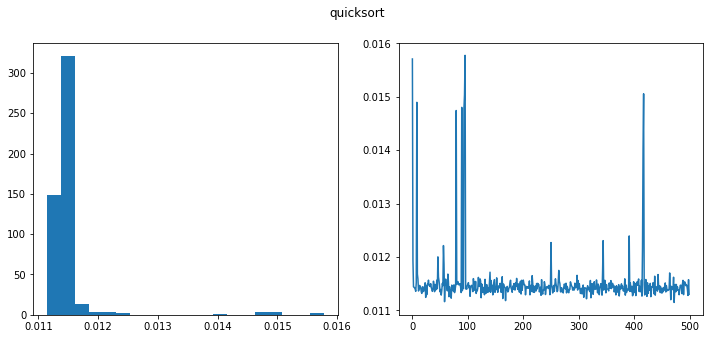

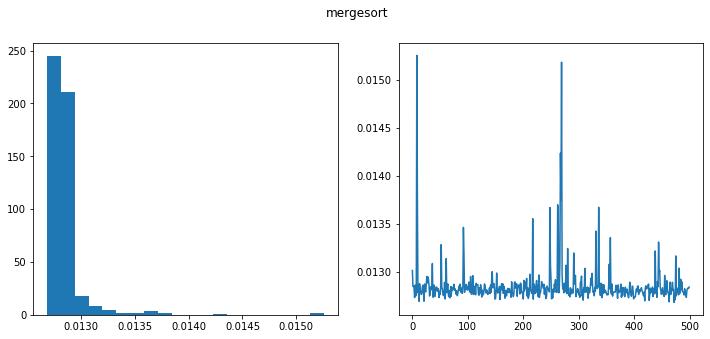

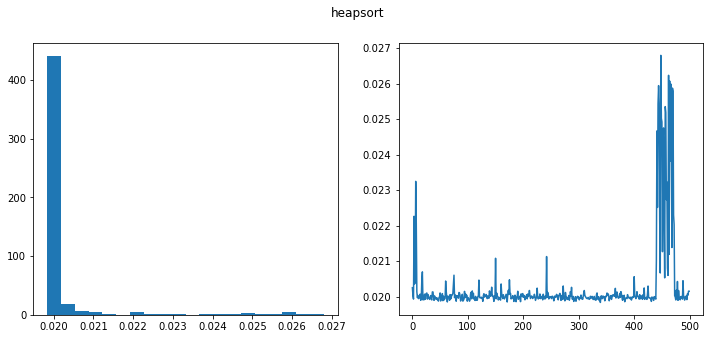

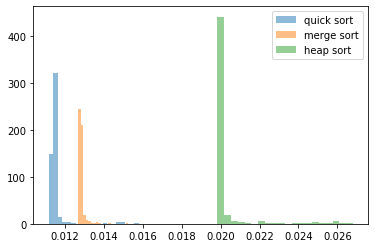

In [208]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_normal)

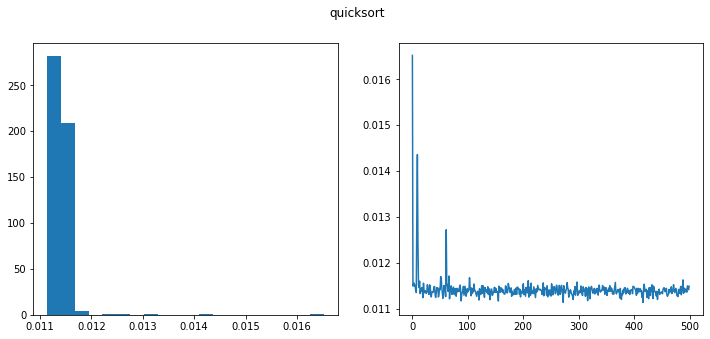

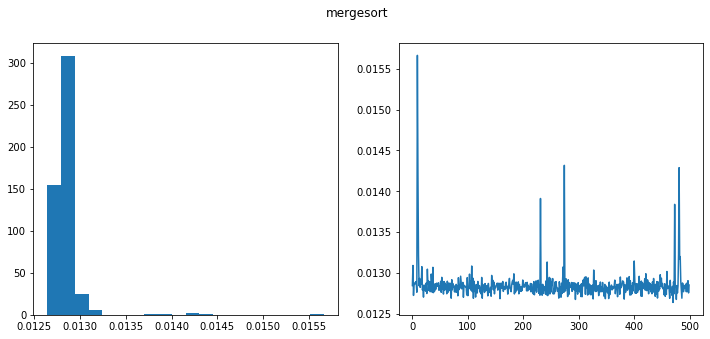

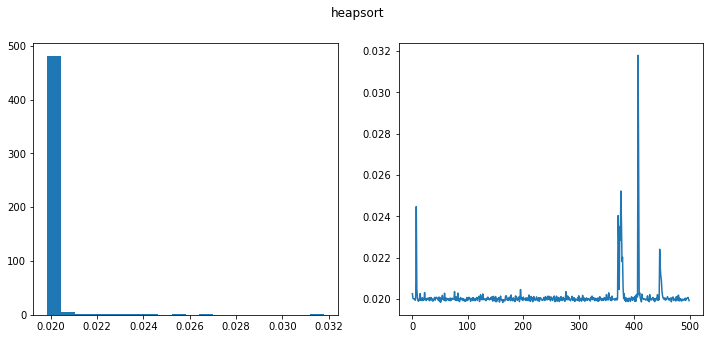

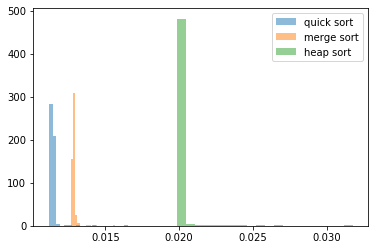

In [209]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform)

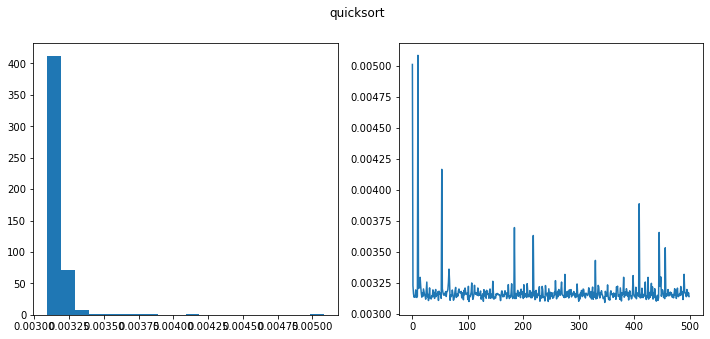

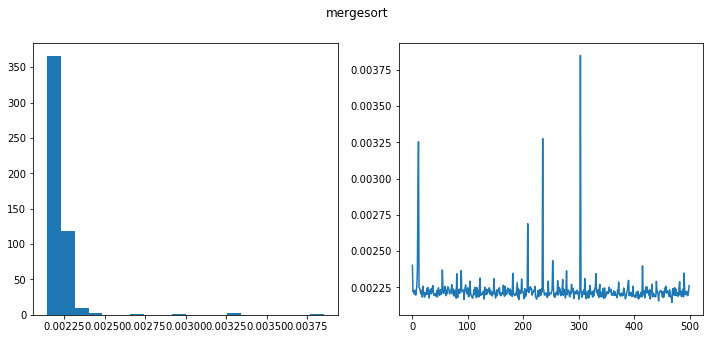

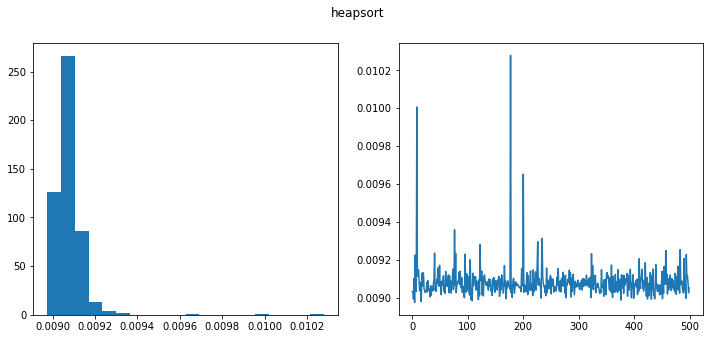

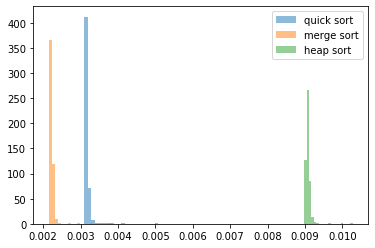

In [210]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform_sorted)

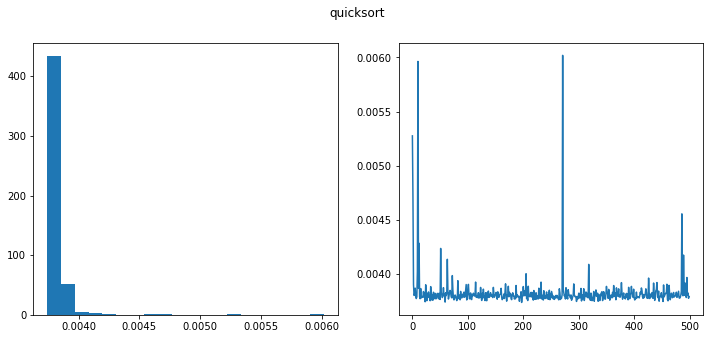

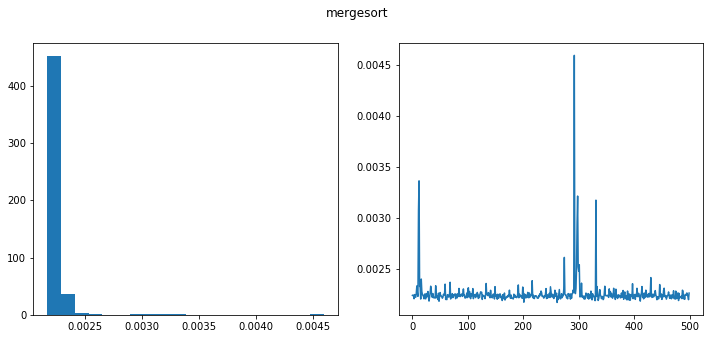

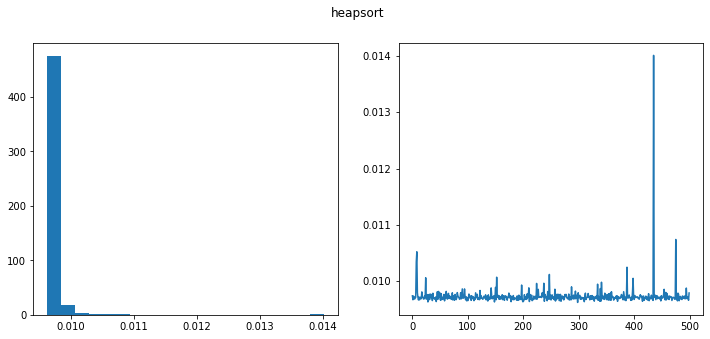

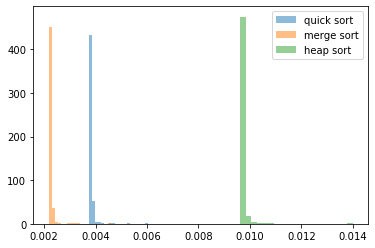

In [211]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean,algo)
plot_runtimes_together(df_uniform_reverse_sorted)

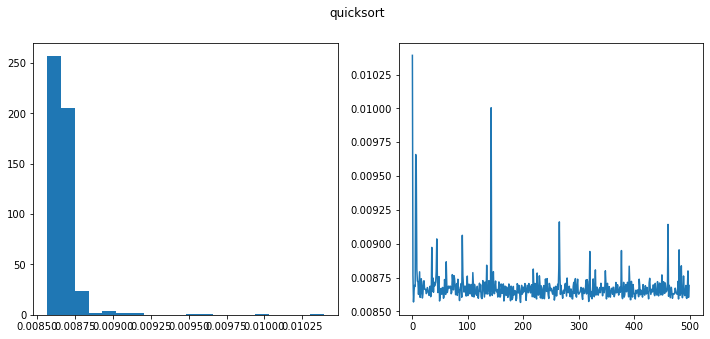

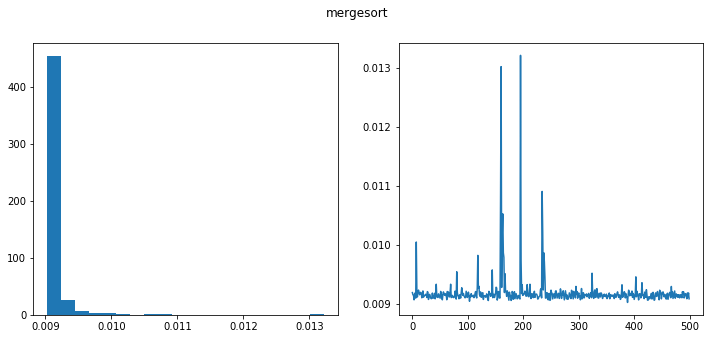

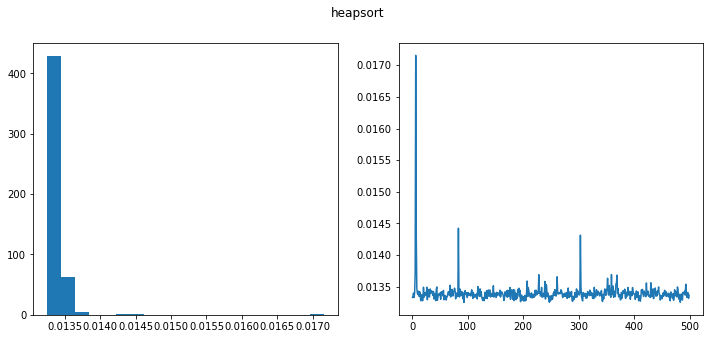

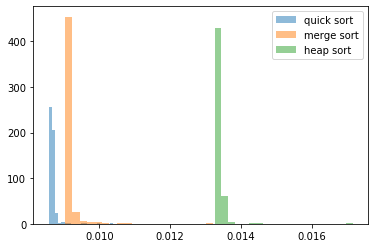

In [212]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform_nearly_sorted)

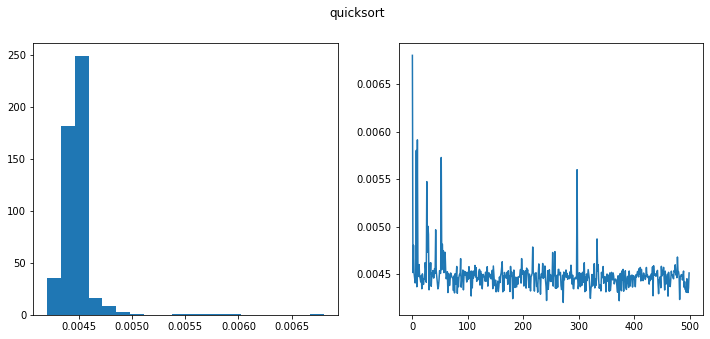

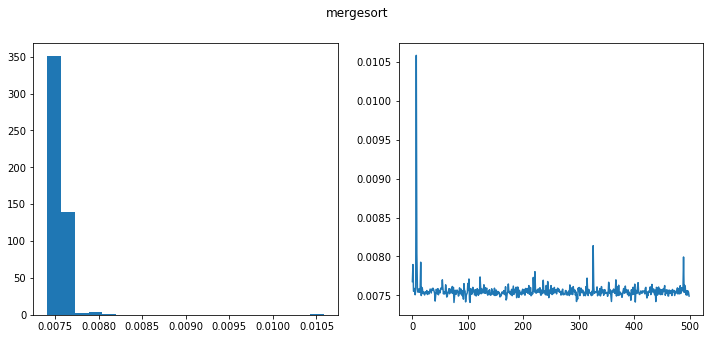

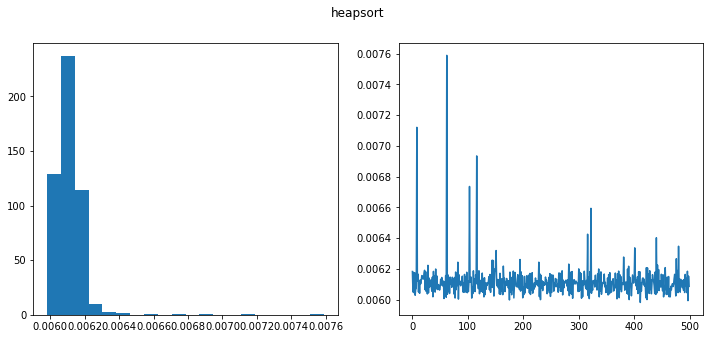

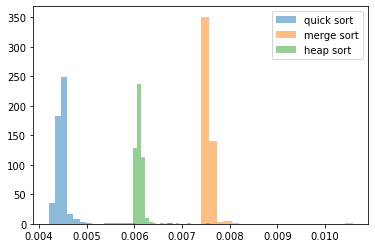

In [213]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_zipf)

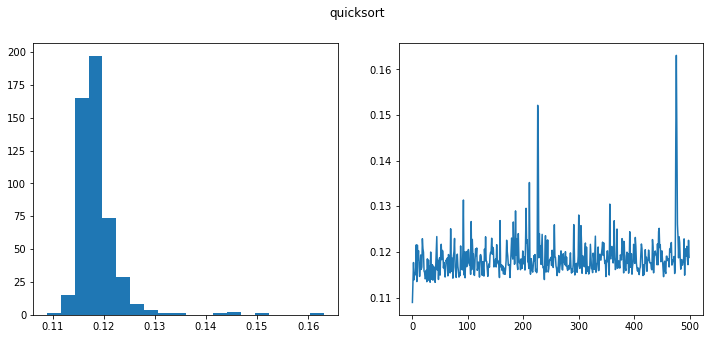

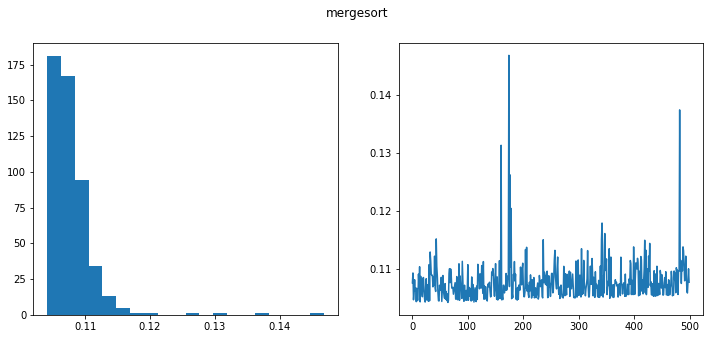

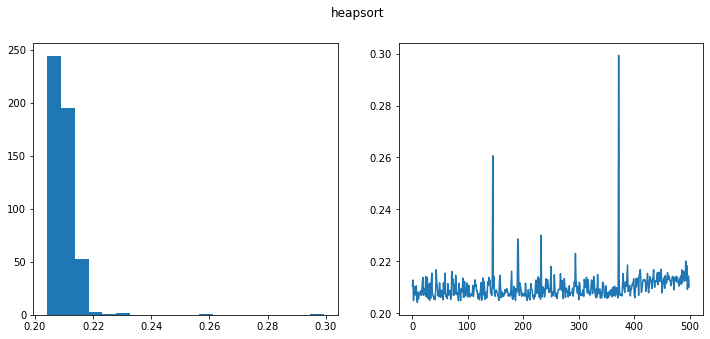

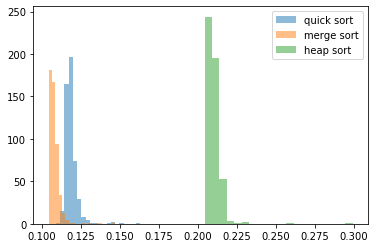

In [214]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_strings, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_strings)

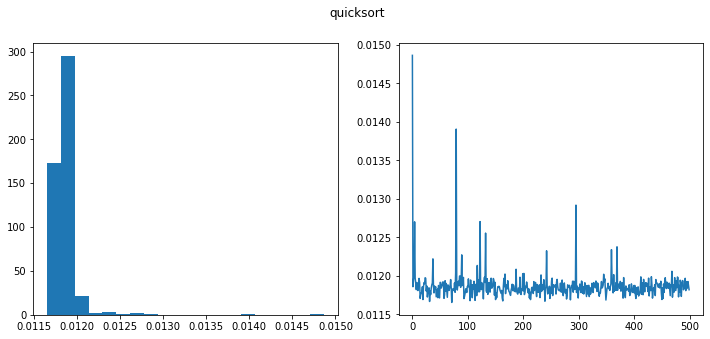

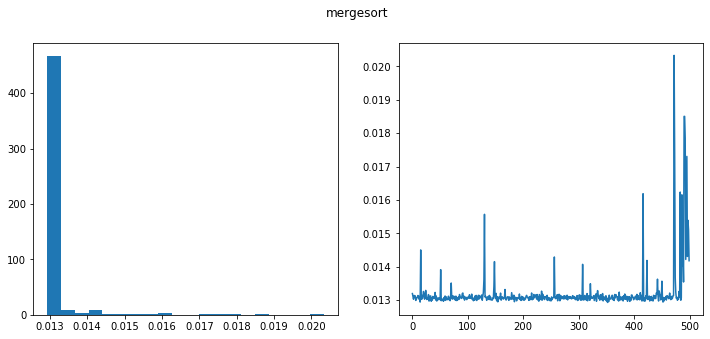

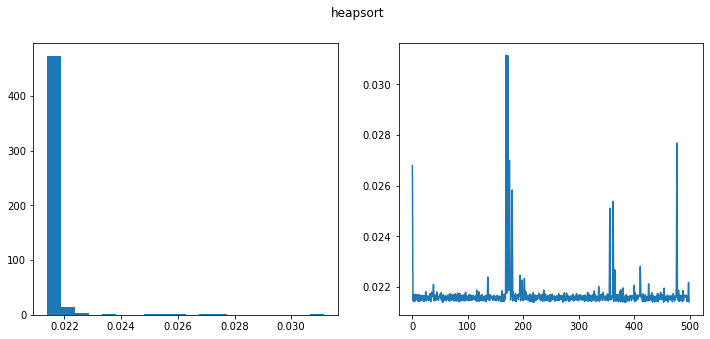

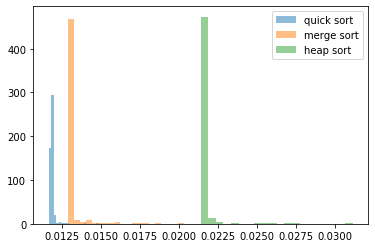

In [215]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_dates, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_dates)

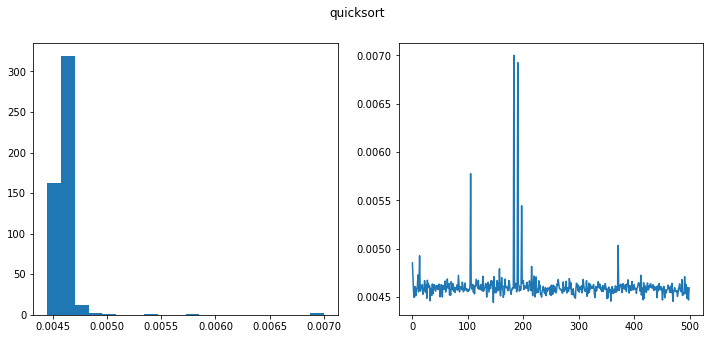

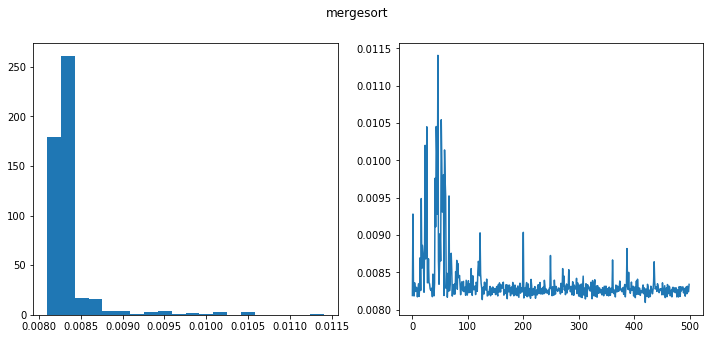

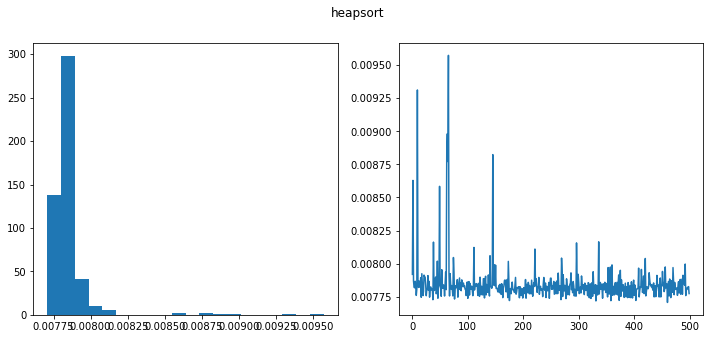

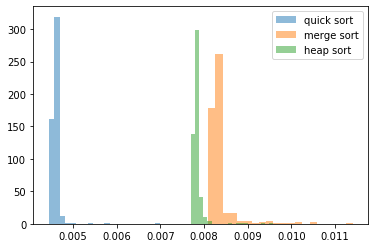

In [216]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers)

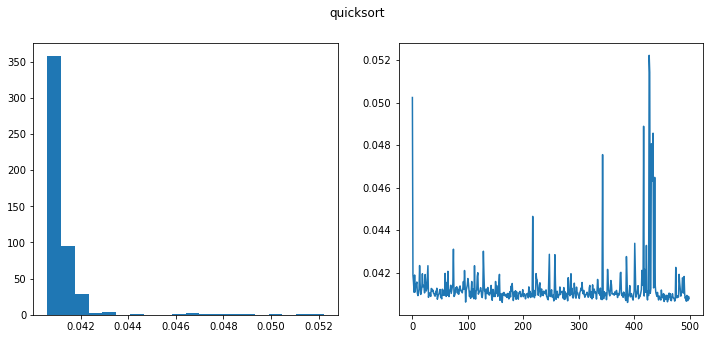

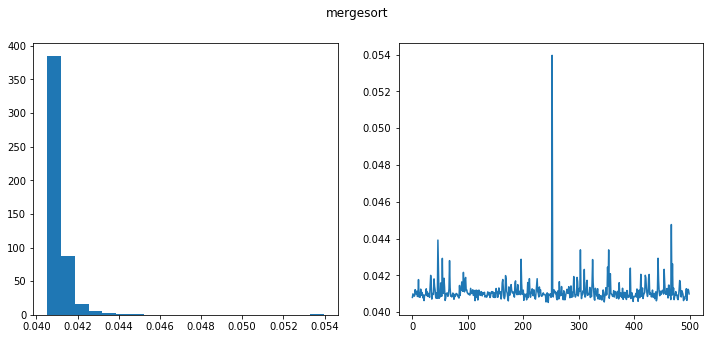

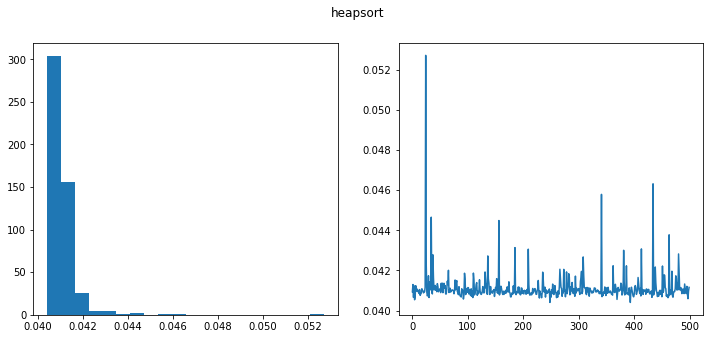

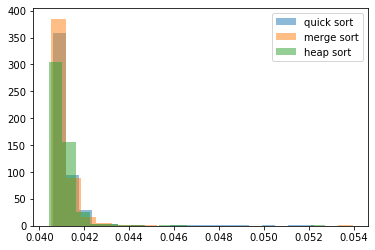

In [217]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uf_nearly, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uf_nearly)

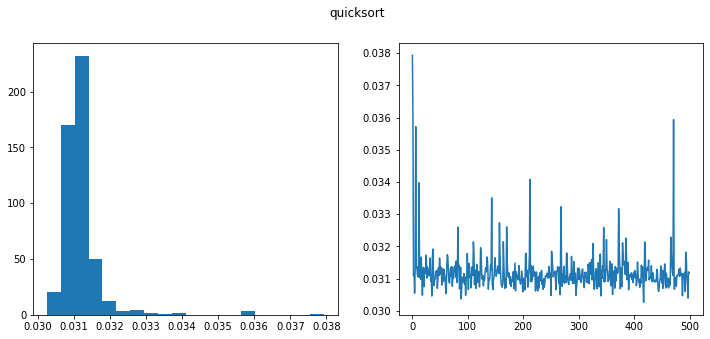

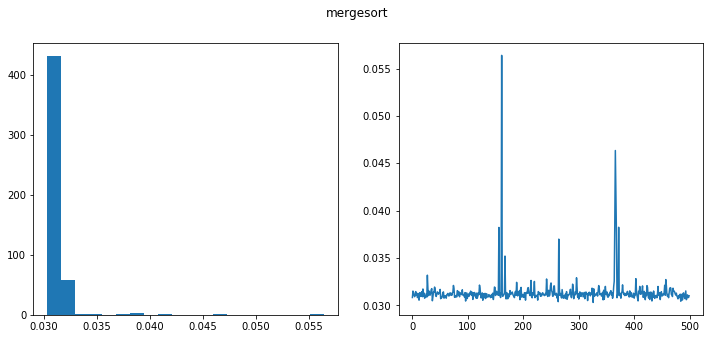

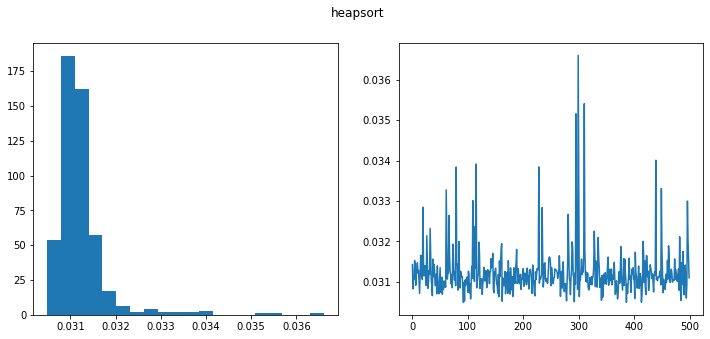

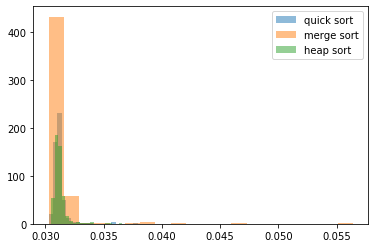

In [218]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uf_reverse, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uf_reverse)

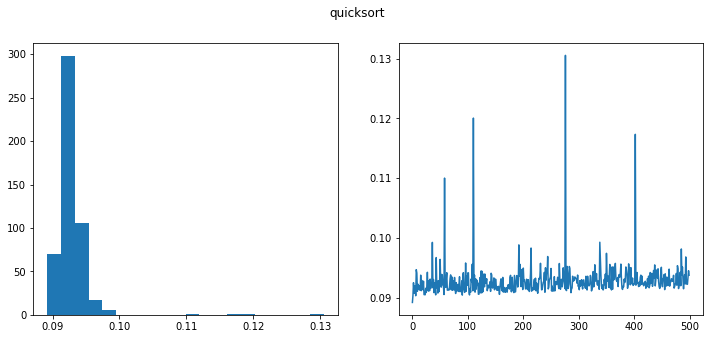

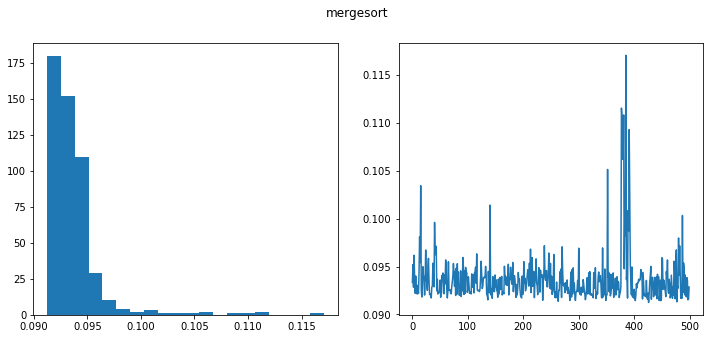

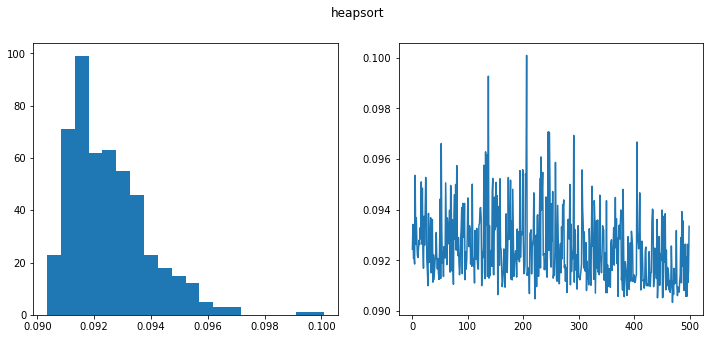

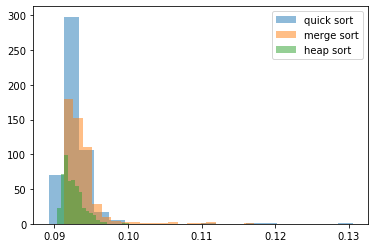

In [219]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_string, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_string)

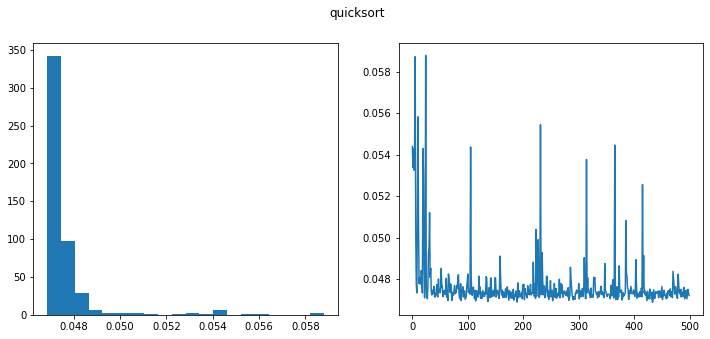

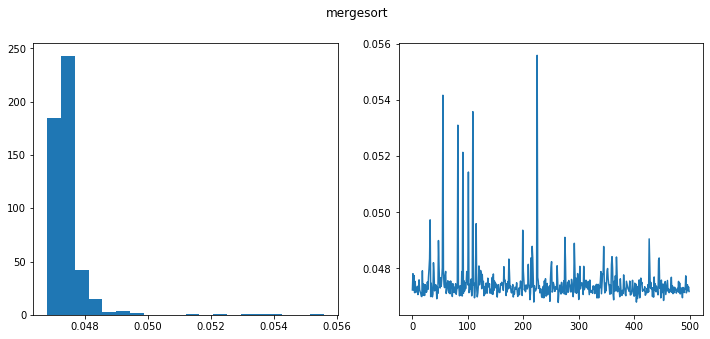

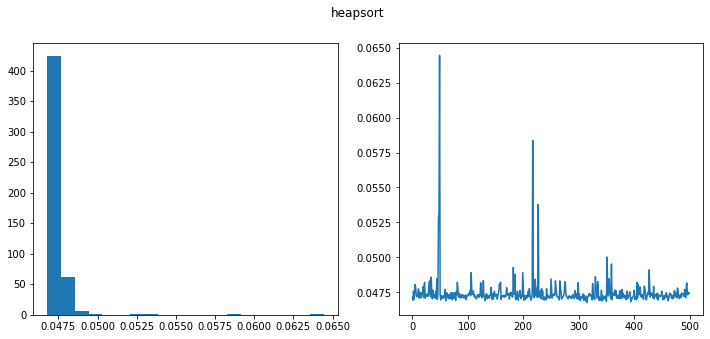

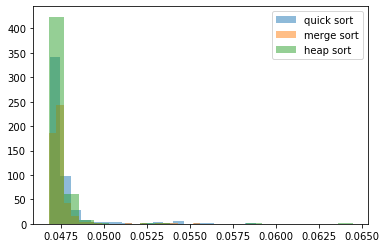

In [220]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uniform, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uniform)
